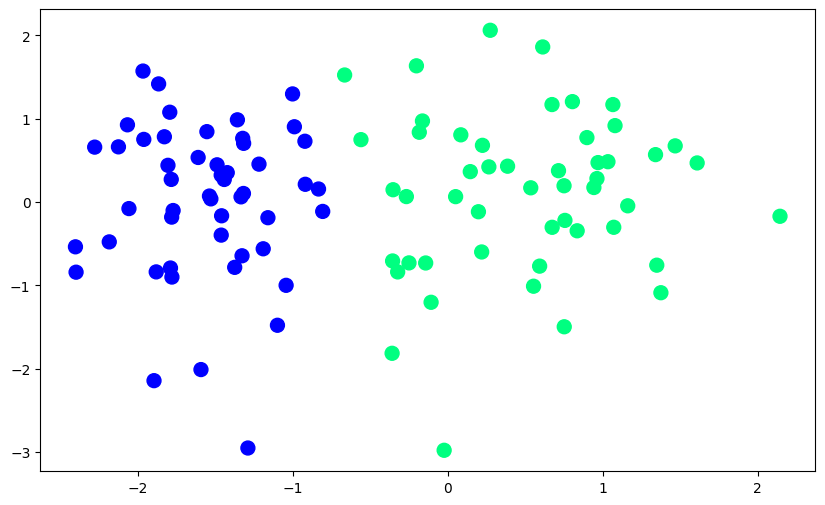

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 1, n_redundant=0,n_classes = 2, n_clusters_per_class=1, random_state= 41, hypercube=False, class_sep=10)
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1], c = y, cmap='winter', s = 100)

In [4]:
def perceptron(X,y):
    # 1  1 1 add krdenge hr row k first column m
    X = np.insert(X,0,1,axis = 1)
    # weights lia total jitne column h utne or unko 1 se initialise krdia
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr * (y[j]-y_hat)*X[j]

    return weights[0], weights[1:]

def step(z):
    return 1 if z>0 else 0

intercept_ , coef = perceptron(X,y)
print(intercept_)
print(coef)

0.9
[1.36986293 0.09906104]


(-3.0, 2.0)

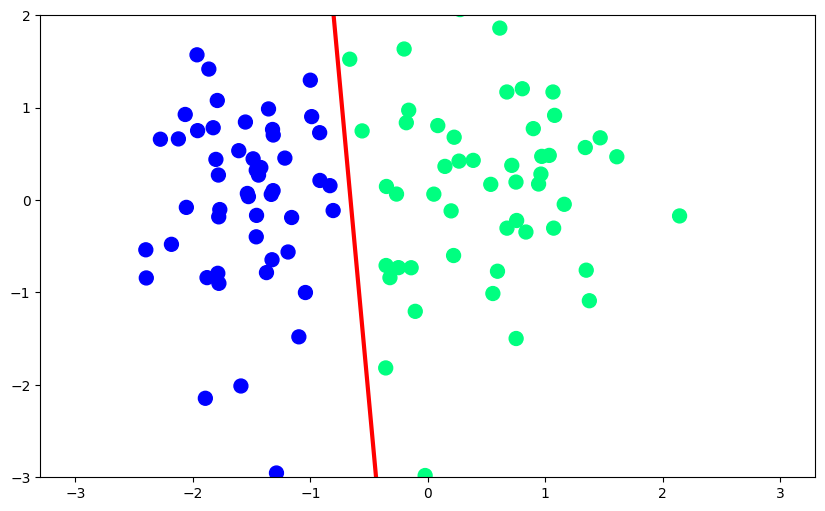

In [5]:
m = -(coef[0]/coef[1])
b = -(intercept_/coef[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color = 'red' , linewidth = 3)
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'winter', s = 100)
plt.ylim(-3,2)

the problem with perceptron trick is that it stops once we get a line that correctly classifies all points, but there can be many lines like that, we want the best fit, that is why this above perceptron trick code doesnot give the same result as logistic regression, bcz logistic regression modifies perceptron trick a bit. below is the result of applying logistic regression on the same data. logistic regression gives the best fit line.

(-3.0, 2.0)

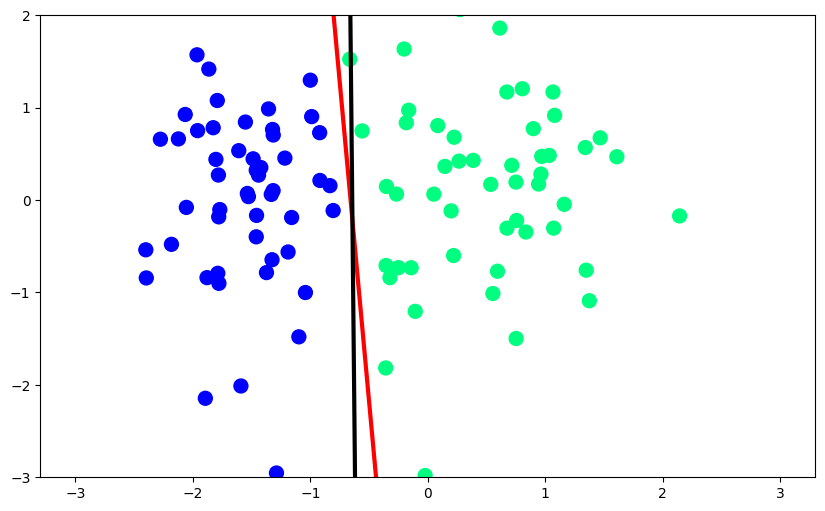

In [6]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)
LogisticRegression()
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

now using perceptron trick with sigmoid

(-3.0, 2.0)

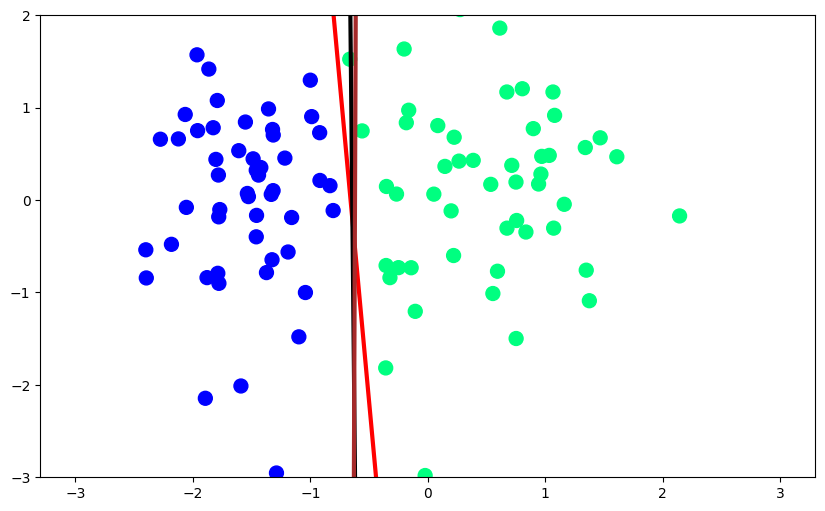

In [7]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
def sigmoid(z):
    return 1/(1 + np.exp(-z))
intercept_,coef_ = perceptron(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
# brown is line bcz of sigmoid, black is actual logistic regression, red is using only perceptron trick
# brown is a slight improvement on black but still not same as logistic
# we need more modifications.